# Penulisan Ilmiah
## Datadiri :
>
> Nama : Muhammad Faqih Hakim
>
> NPM : 51422032

In [1]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.9 MB/s eta 0:00:00


In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.0 MB/s eta 0:00:00


In [3]:
import yaml
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import random
import itertools
from ultralytics import YOLO
from roboflow import Roboflow
import pandas as pd
from google.colab import files
from datetime import datetime

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
rf = Roboflow(api_key="jFj6dO8DDczUZ9kJ1xuo")
project = rf.workspace("kkkk-6bpnc").project("kk-8ucwu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to kk-2 in yolov8:: 100%|██████████| 14612/14612 [00:03<00:00, 4044.86it/s]


In [5]:
train_images_path = "/content/kk-2/train/images"
train_labels_path = "/content/kk-2/train/labels"

In [6]:
image_files = [f for f in os.listdir(train_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(image_files, min(12, len(image_files)))

In [7]:
def draw_bounding_boxes(img, label_path):
    h, w = img.shape[:2]
    with open("/content/kk-2/data.yaml", 'r') as f:
        data = yaml.safe_load(f)
    class_names = data['names']

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            if line.strip():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                color = (0, 255, 0)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                class_name = class_names[class_id] if class_id < len(class_names) else f"Class_{class_id}"
                text_size, _ = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                text_y = y1 - 5 if y1 - 5 > text_size[1] else y2 + text_size[1] + 5
                cv2.putText(img, class_name, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

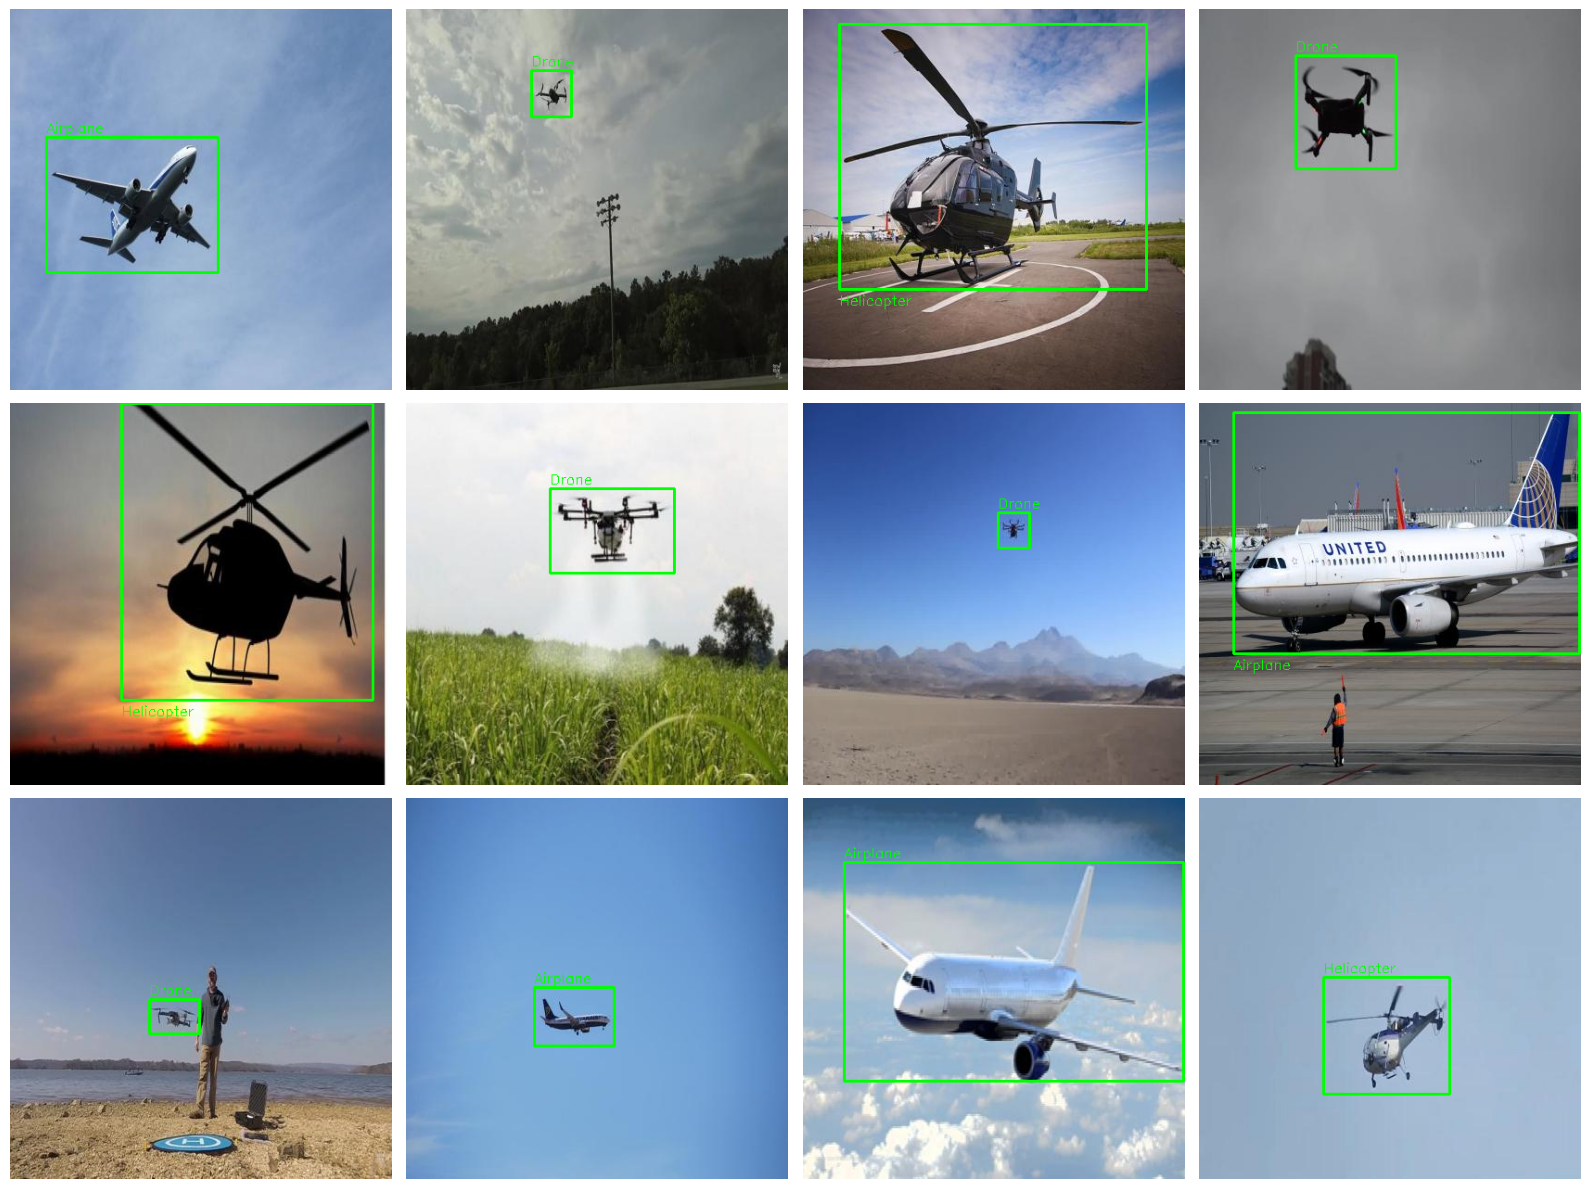

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, img_file in enumerate(sample_files):
    img_path = os.path.join(train_images_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(train_labels_path, label_file)

    img = draw_bounding_boxes(img, label_path)

    axes[i].imshow(img)
    axes[i].axis('off')

for i in range(len(sample_files), 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
learning_rates = [0.0005, 0.001]
batch_sizes = [8]
weight_decays = [0.0005, 0.001]
optimizers = ['Adam']

In [10]:
combos = list(itertools.product(learning_rates, batch_sizes, weight_decays, optimizers))
print(f"Total kombinasi: {len(combos)}")
for i, (lr, batch, wd, opt) in enumerate(combos):
    print(f"Kombinasi {i+1}: LR={lr}, Batch={batch}, WD={wd}, Optimizer={opt}")

Total kombinasi: 4
Kombinasi 1: LR=0.0005, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 2: LR=0.0005, Batch=8, WD=0.001, Optimizer=Adam
Kombinasi 3: LR=0.001, Batch=8, WD=0.0005, Optimizer=Adam
Kombinasi 4: LR=0.001, Batch=8, WD=0.001, Optimizer=Adam


In [11]:
for i, (lr, batch, weight_decay, optimizer) in enumerate(combos):
    print("=" * 60)
    print(f"Training Model {i+1}/{len(combos)}")
    print(f"Start Time   : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Parameters  : lr={lr}, batch={batch}, weight_decay={weight_decay}, optimizer={optimizer}")
    print(f"Dir Save Name   : run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}")
    print("=" * 60)

    model = YOLO("yolo11n.pt")

    model.train(
        data="/content/kk-2/data.yaml",
        epochs=15,
        imgsz=640,
        batch=batch,
        lr0=lr,
        optimizer=optimizer,
        weight_decay=weight_decay,

        # Regularization
        warmup_epochs=3,
        dropout=0.1,
        patience=10,

        # Augmentation
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,

        # Output
        name=f"YOLOV11_run_{i+1}_lr{lr}_b{batch}_wd{weight_decay}_{optimizer}",
        plots=False,
        save=True,
        save_period=10,
        verbose=False,
        device=0
    )


Training Model 1/4
Start Time   : 2025-06-01 12:09:05
Parameters  : lr=0.0005, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_1_lr0.0005_b8_wd0.0005_Adam


100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 425.6±206.4 MB/s, size: 15.4 KB)


train: Scanning /content/kk-2/train/labels... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:02<00:00, 2351.30it/s]


train: New cache created: /content/kk-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 447.2±364.7 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<00:00, 1092.27it/s]


val: New cache created: /content/kk-2/valid/labels.cache
optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.19G      1.504      2.149      1.574         11        640: 100%|██████████| 721/721 [02:22<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.67it/s]


                   all        778        843      0.541      0.641      0.617       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.44G      1.396      1.649        1.5         23        640: 100%|██████████| 721/721 [02:13<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.35it/s]

                   all        778        843       0.68      0.653      0.724      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.45G      1.354      1.523      1.477         19        640: 100%|██████████| 721/721 [02:12<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.85it/s]

                   all        778        843      0.774      0.752      0.814      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.46G      1.306      1.403      1.451         11        640: 100%|██████████| 721/721 [02:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.38it/s]

                   all        778        843      0.903      0.758       0.88      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.48G      1.287      1.309      1.438         13        640: 100%|██████████| 721/721 [02:12<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.10it/s]

                   all        778        843      0.919      0.814      0.916      0.547


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.49G       1.11     0.8998      1.339          7        640: 100%|██████████| 721/721 [02:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.13it/s]

                   all        778        843       0.94       0.85       0.94      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.51G       1.08     0.7967      1.313          7        640: 100%|██████████| 721/721 [02:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.08it/s]

                   all        778        843      0.933      0.847      0.929      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.52G      1.046     0.7301      1.277          8        640: 100%|██████████| 721/721 [02:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.74it/s]

                   all        778        843      0.898      0.899      0.946      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.54G       1.03     0.6841      1.262          8        640: 100%|██████████| 721/721 [02:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.47it/s]

                   all        778        843      0.938       0.91      0.962      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.55G      1.017       0.65      1.259          7        640: 100%|██████████| 721/721 [02:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.65it/s]

                   all        778        843       0.92      0.929      0.961      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.57G     0.9898     0.6177      1.232          7        640: 100%|██████████| 721/721 [02:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.93it/s]

                   all        778        843       0.95      0.939      0.968      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.58G     0.9594     0.5809      1.214          7        640: 100%|██████████| 721/721 [02:06<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.09it/s]

                   all        778        843      0.966      0.916      0.964      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       1.6G     0.9437     0.5566      1.198          8        640: 100%|██████████| 721/721 [02:06<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.81it/s]

                   all        778        843      0.955      0.921      0.967      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.61G     0.9185       0.53      1.182          8        640: 100%|██████████| 721/721 [02:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.04it/s]


                   all        778        843      0.961      0.932      0.969      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.63G     0.9083     0.5156      1.174          7        640: 100%|██████████| 721/721 [02:03<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.94it/s]

                   all        778        843      0.949      0.948       0.97      0.745



15 epochs completed in 0.564 hours.
Optimizer stripped from runs/detect/YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.09it/s]


                   all        778        843      0.949      0.949       0.97      0.745
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Training Model 2/4
Start Time   : 2025-06-01 12:43:21
Parameters  : lr=0.0005, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_2_lr0.0005_b8_wd0.001_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 249.3±88.6 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV11_run_2_lr0.0005_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.31G        1.5       2.12       1.59         11        640: 100%|██████████| 721/721 [02:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.74it/s]

                   all        778        843      0.699      0.644      0.712      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15       1.5G      1.389      1.628      1.499         23        640: 100%|██████████| 721/721 [02:23<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.63it/s]

                   all        778        843      0.816      0.711      0.826      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15       1.5G      1.352      1.491      1.471         19        640: 100%|██████████| 721/721 [02:20<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.66it/s]

                   all        778        843      0.879      0.739      0.859      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15       1.5G      1.301      1.383      1.444         11        640: 100%|██████████| 721/721 [02:20<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.75it/s]

                   all        778        843      0.879      0.825      0.911      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       1.5G      1.293      1.308      1.439         13        640: 100%|██████████| 721/721 [02:19<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.93it/s]

                   all        778        843      0.905      0.864      0.931       0.58


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       1.5G      1.113     0.8855      1.332          7        640: 100%|██████████| 721/721 [02:12<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.74it/s]

                   all        778        843      0.929      0.816      0.913       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       1.5G      1.081      0.788      1.301          7        640: 100%|██████████| 721/721 [02:09<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.70it/s]

                   all        778        843      0.923      0.894      0.946      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       1.5G      1.053     0.7355      1.277          8        640: 100%|██████████| 721/721 [02:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.81it/s]

                   all        778        843      0.927      0.912      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       1.5G      1.029     0.6719      1.255          8        640: 100%|██████████| 721/721 [02:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.72it/s]

                   all        778        843      0.942      0.903      0.965      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       1.5G       1.02       0.64      1.252          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.47it/s]

                   all        778        843      0.946       0.92      0.964      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       1.5G     0.9956      0.624      1.228          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.73it/s]

                   all        778        843      0.955      0.905      0.969      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       1.5G     0.9684     0.5844      1.216          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.82it/s]

                   all        778        843      0.968      0.925      0.971      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       1.5G     0.9509     0.5556      1.198          8        640: 100%|██████████| 721/721 [02:08<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.75it/s]

                   all        778        843      0.961      0.915       0.97       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15       1.5G     0.9277     0.5207      1.186          8        640: 100%|██████████| 721/721 [02:08<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.89it/s]

                   all        778        843      0.957      0.935      0.971      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       1.5G     0.9158     0.5091      1.172          7        640: 100%|██████████| 721/721 [02:06<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.01it/s]

                   all        778        843      0.963      0.934      0.973      0.734



15 epochs completed in 0.586 hours.
Optimizer stripped from runs/detect/YOLOV11_run_2_lr0.0005_b8_wd0.001_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV11_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV11_run_2_lr0.0005_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.66it/s]

                   all        778        843      0.963      0.933      0.973      0.734
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.8ms postprocess per image


Training Model 3/4
Start Time   : 2025-06-01 13:18:39
Parameters  : lr=0.001, batch=8, weight_decay=0.0005, optimizer=Adam
Dir Save Name   : run_3_lr0.001_b8_wd0.0005_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 226.0±79.1 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV11_run_3_lr0.001_b8_wd0.0005_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.24G      1.545      2.164       1.63         11        640: 100%|██████████| 721/721 [02:29<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.73it/s]

                   all        778        843      0.511      0.565       0.53      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.43G      1.479      1.784      1.594         23        640: 100%|██████████| 721/721 [02:22<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.27it/s]

                   all        778        843      0.635      0.557      0.668      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.43G      1.446      1.668      1.568         19        640: 100%|██████████| 721/721 [02:21<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.60it/s]

                   all        778        843       0.77      0.622      0.742      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.43G      1.395      1.564      1.533         11        640: 100%|██████████| 721/721 [02:21<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.77it/s]

                   all        778        843       0.83      0.738      0.829       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.43G      1.369      1.472      1.516         13        640: 100%|██████████| 721/721 [02:21<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.92it/s]

                   all        778        843      0.878      0.766      0.893      0.561


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.43G      1.182      1.026      1.417          7        640: 100%|██████████| 721/721 [02:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.77it/s]

                   all        778        843      0.843      0.783      0.853      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.43G      1.147      0.906       1.38          7        640: 100%|██████████| 721/721 [02:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.68it/s]

                   all        778        843       0.93      0.832      0.922      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.43G      1.114     0.8302      1.344          8        640: 100%|██████████| 721/721 [02:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.99it/s]

                   all        778        843       0.93      0.869      0.938      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.43G      1.088     0.7799      1.327          8        640: 100%|██████████| 721/721 [02:08<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.72it/s]

                   all        778        843       0.95      0.849      0.931      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.43G       1.07     0.7257      1.312          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.09it/s]

                   all        778        843      0.933        0.9      0.954      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.43G      1.047     0.6888      1.288          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.94it/s]

                   all        778        843      0.953      0.904      0.963      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.43G      1.019     0.6465      1.271          7        640: 100%|██████████| 721/721 [02:09<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.72it/s]

                   all        778        843      0.941      0.911      0.963      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.43G      1.002     0.6226      1.257          8        640: 100%|██████████| 721/721 [02:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.75it/s]

                   all        778        843      0.936      0.926       0.97      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.43G      0.979      0.584      1.241          8        640: 100%|██████████| 721/721 [02:09<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.98it/s]

                   all        778        843      0.946      0.916      0.963      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.43G     0.9568     0.5617      1.223          7        640: 100%|██████████| 721/721 [02:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.72it/s]

                   all        778        843      0.953      0.932      0.976      0.649



15 epochs completed in 0.587 hours.
Optimizer stripped from runs/detect/YOLOV11_run_3_lr0.001_b8_wd0.0005_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV11_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV11_run_3_lr0.001_b8_wd0.0005_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  9.28it/s]

                   all        778        843      0.936      0.925       0.97      0.661
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image


Training Model 4/4
Start Time   : 2025-06-01 13:54:00
Parameters  : lr=0.001, batch=8, weight_decay=0.001, optimizer=Adam
Dir Save Name   : run_4_lr0.001_b8_wd0.001_Adam
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/kk-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=Fa

train: Scanning /content/kk-2/train/labels.cache... 5767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5767/5767 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 187.1±62.5 MB/s, size: 17.3 KB)


val: Scanning /content/kk-2/valid/labels.cache... 778 images, 0 backgrounds, 0 corrupt: 100%|██████████| 778/778 [00:00<?, ?it/s]


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/YOLOV11_run_4_lr0.001_b8_wd0.001_Adam
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      1.22G      1.536      2.151      1.623         11        640: 100%|██████████| 721/721 [02:24<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.12it/s]

                   all        778        843      0.418      0.461      0.374      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      1.41G      1.472      1.768      1.589         23        640: 100%|██████████| 721/721 [02:17<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.90it/s]

                   all        778        843      0.748      0.559      0.698      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      1.41G      1.439      1.661      1.561         19        640: 100%|██████████| 721/721 [02:13<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.99it/s]

                   all        778        843      0.703      0.661       0.73      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      1.41G      1.398      1.555      1.529         11        640: 100%|██████████| 721/721 [02:13<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.97it/s]

                   all        778        843      0.783      0.744      0.849      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      1.41G       1.37      1.451      1.512         13        640: 100%|██████████| 721/721 [02:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.03it/s]

                   all        778        843       0.88       0.75      0.881      0.552


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      1.41G      1.176      1.007      1.407          7        640: 100%|██████████| 721/721 [02:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.88it/s]

                   all        778        843       0.84      0.798      0.878      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      1.41G      1.149     0.8876      1.375          7        640: 100%|██████████| 721/721 [02:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.02it/s]

                   all        778        843      0.868      0.818      0.916      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      1.41G      1.108     0.8182      1.335          8        640: 100%|██████████| 721/721 [02:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.10it/s]

                   all        778        843      0.928      0.848      0.944      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      1.41G       1.09      0.765      1.326          8        640: 100%|██████████| 721/721 [02:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.10it/s]

                   all        778        843      0.954      0.831      0.943      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      1.41G      1.076     0.7145      1.322          7        640: 100%|██████████| 721/721 [02:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.19it/s]

                   all        778        843       0.91      0.894      0.947      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      1.41G      1.047     0.6905      1.292          7        640: 100%|██████████| 721/721 [02:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.14it/s]

                   all        778        843      0.932       0.88      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      1.41G       1.02     0.6359      1.279          7        640: 100%|██████████| 721/721 [02:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.92it/s]

                   all        778        843      0.951      0.893      0.961      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      1.41G      1.002     0.6083      1.256          8        640: 100%|██████████| 721/721 [02:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.02it/s]

                   all        778        843      0.943      0.917      0.969      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      1.41G     0.9681     0.5672      1.234          8        640: 100%|██████████| 721/721 [02:03<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  8.11it/s]

                   all        778        843      0.941      0.934      0.968      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      1.41G     0.9515     0.5456      1.219          7        640: 100%|██████████| 721/721 [02:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.99it/s]

                   all        778        843      0.952      0.935      0.973      0.736



15 epochs completed in 0.561 hours.
Optimizer stripped from runs/detect/YOLOV11_run_4_lr0.001_b8_wd0.001_Adam/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/YOLOV11_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt, 5.5MB

Validating runs/detect/YOLOV11_run_4_lr0.001_b8_wd0.001_Adam/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:05<00:00,  8.99it/s]

                   all        778        843      0.952      0.935      0.973      0.736
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.4ms postprocess per image


In [12]:
base_dir = "/content/runs/detect"
results_summary = []

for run_dir in sorted(os.listdir(base_dir)):
    run_path = os.path.join(base_dir, run_dir)
    results_csv = os.path.join(run_path, "results.csv")

    if os.path.isfile(results_csv):
        df = pd.read_csv(results_csv)

        best_epoch = df["metrics/mAP50-95(B)"].idxmax()
        best_row = df.loc[best_epoch]

        results_summary.append({
            "run_name": run_dir,
            "epoch": int(best_row["epoch"]),
            "mAP_0.5": best_row["metrics/mAP50(B)"],
            "mAP_0.5:0.95": best_row["metrics/mAP50-95(B)"],
            "precision": best_row["metrics/precision(B)"],
            "recall": best_row["metrics/recall(B)"]
        })
    else:
        print(f"di {run_dir} (tidak ada results.csv)")

summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.sort_values(by="mAP_0.5:0.95", ascending=False)


print("\nRingkasan Hasil Evaluasi:")
print(summary_df.to_string(index=False))


Ringkasan Hasil Evaluasi:
                               run_name  epoch  mAP_0.5  mAP_0.5:0.95  precision  recall
YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam     15  0.97029       0.74494    0.94856 0.94824
  YOLOV11_run_4_lr0.001_b8_wd0.001_Adam     15  0.97325       0.73567    0.95156 0.93474
 YOLOV11_run_2_lr0.0005_b8_wd0.001_Adam     15  0.97328       0.73419    0.96348 0.93354
 YOLOV11_run_3_lr0.001_b8_wd0.0005_Adam     13  0.97034       0.66149    0.93595 0.92579


In [15]:
model_fix = YOLO("/content/runs/detect/YOLOV11_run_1_lr0.0005_b8_wd0.0005_Adam/weights/best.pt")

In [16]:
results = model_fix.val(data='/content/kk-2/data.yaml', split='test', imgsz=640)
print(f"📈 mAP@0.5       : {results.box.map50:.4f}")
print(f"📉 mAP@0.5:0.95  : {results.box.map:.4f}")
print(f"✅ Precision     : {results.box.mp:.4f}")
print(f"🎯 Recall        : {results.box.mr:.4f}")

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 515.8±353.8 MB/s, size: 19.1 KB)


val: Scanning /content/kk-2/test/labels... 755 images, 0 backgrounds, 0 corrupt: 100%|██████████| 755/755 [00:00<00:00, 2407.12it/s]

val: New cache created: /content/kk-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.95it/s]


                   all        755        813      0.958      0.963      0.981      0.769
              Airplane         53         53      0.945       0.98      0.986      0.824
                  Bird         86         97      0.932      0.948      0.964      0.789
                 Drone        539        573      0.989      0.962      0.992      0.743
            Helicopter         78         90      0.966      0.961      0.983      0.722
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
📈 mAP@0.5       : 0.9815
📉 mAP@0.5:0.95  : 0.7693
✅ Precision     : 0.9582
🎯 Recall        : 0.9631


📸 Silakan upload file gambar (.jpg/.png):


Saving pngtree-group-of-drones-flying-over-an-empty-land-with-skyline-and-picture-image_2765796.jpg to pngtree-group-of-drones-flying-over-an-empty-land-with-skyline-and-picture-image_2765796.jpg

image 1/1 /content/pngtree-group-of-drones-flying-over-an-empty-land-with-skyline-and-picture-image_2765796.jpg: 384x640 3 Drones, 45.8ms
Speed: 2.2ms preprocess, 45.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


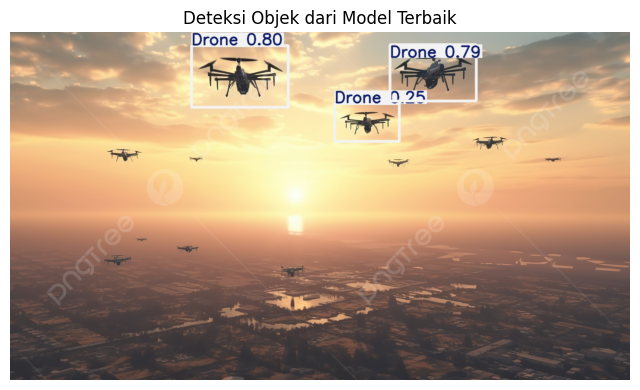

In [17]:
from IPython.display import display

def upload_and_detect():
    print("📸 Silakan upload file gambar (.jpg/.png):")
    uploaded = files.upload()
    image_file = next((f for f in uploaded if f.endswith(('.jpg', '.png'))), None)

    if image_file:
        img = cv2.imread(image_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = model_fix.predict(image_file, imgsz=640, conf=0.25)
        result_img = results[0].plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(result_img)
        plt.axis('off')
        plt.title("Deteksi Objek dari Model Terbaik")
        plt.show()
    else:
        print("File gambar tidak ditemukan. Silakan upload file dengan ekstensi .jpg atau .png.")

upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving pesawat.jpg to pesawat.jpg

image 1/1 /content/pesawat.jpg: 448x640 1 Airplane, 45.9ms
Speed: 2.8ms preprocess, 45.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


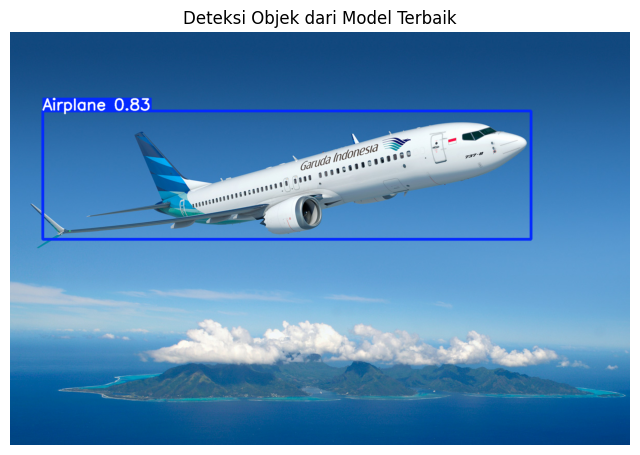

In [19]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving Gambar-helikopter-1.jpg to Gambar-helikopter-1.jpg

image 1/1 /content/Gambar-helikopter-1.jpg: 448x640 1 Helicopter, 9.2ms
Speed: 2.8ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


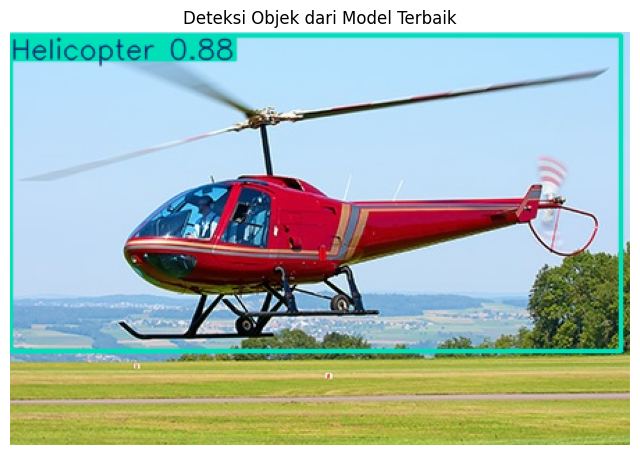

In [20]:
upload_and_detect()

📸 Silakan upload file gambar (.jpg/.png):


Saving burng.jpg to burng.jpg

image 1/1 /content/burng.jpg: 448x640 3 Airplanes, 4 Birds, 12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


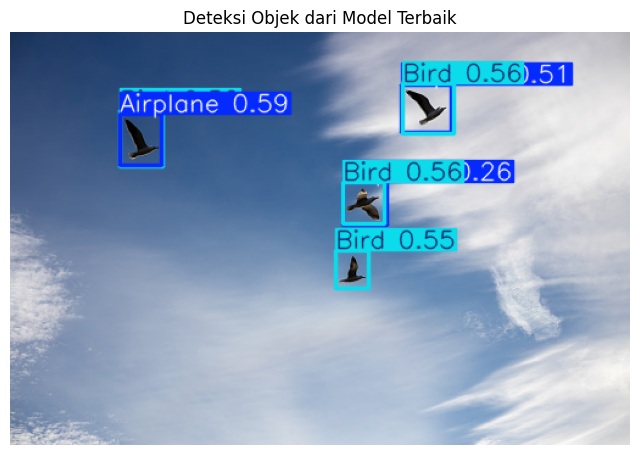

In [21]:
upload_and_detect()